In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chisquare, zscore, chi2_contingency
from sklearn import tree
# from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import missingno as mano
import MLtemplate

In [3]:
bankdf = MLtemplate.import_data("data.csv")

In [3]:
bankdf.head(5)

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [4]:
MLtemplate.data_summary(bankdf,5)

###### Shape ######
(6819, 96)
###### Dimensions ######
2
###### Dtypes ######
Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object
###### head ######
   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                          

In [5]:
bankdf.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [8]:
print(bankdf.dtypes)

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object


In [9]:
MLtemplate.missing_values(bankdf)

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


<AxesSubplot:>

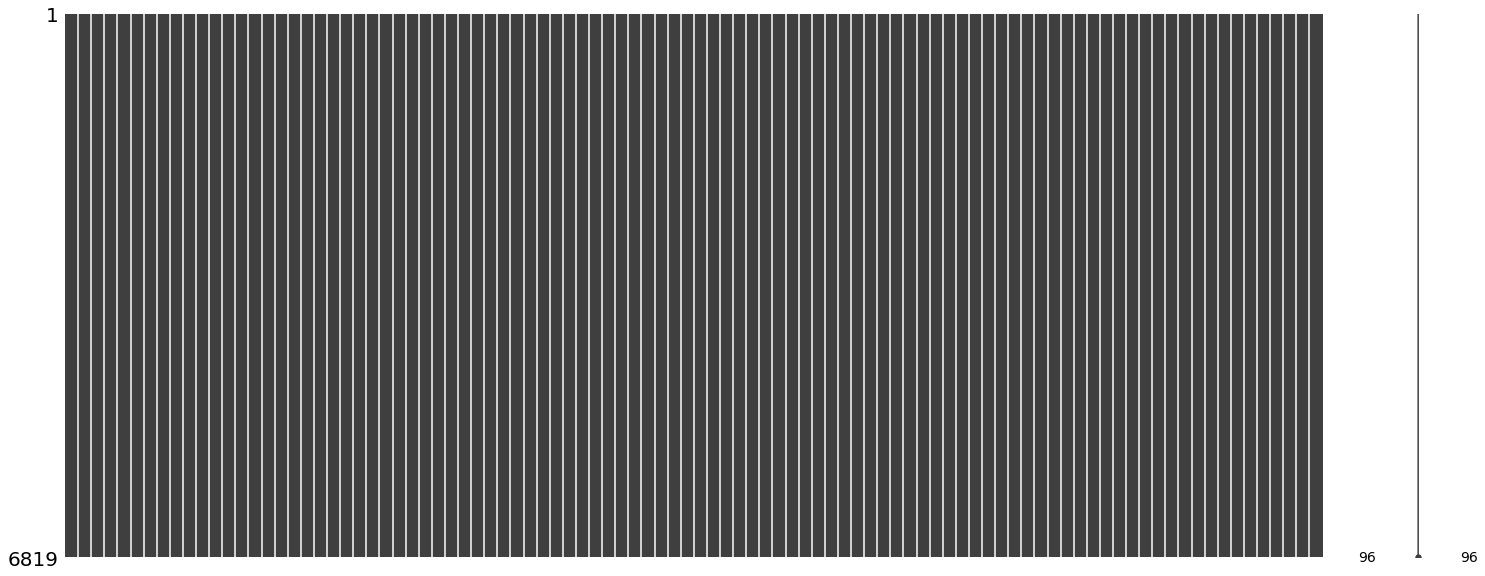

In [14]:
mano.matrix(bankdf)

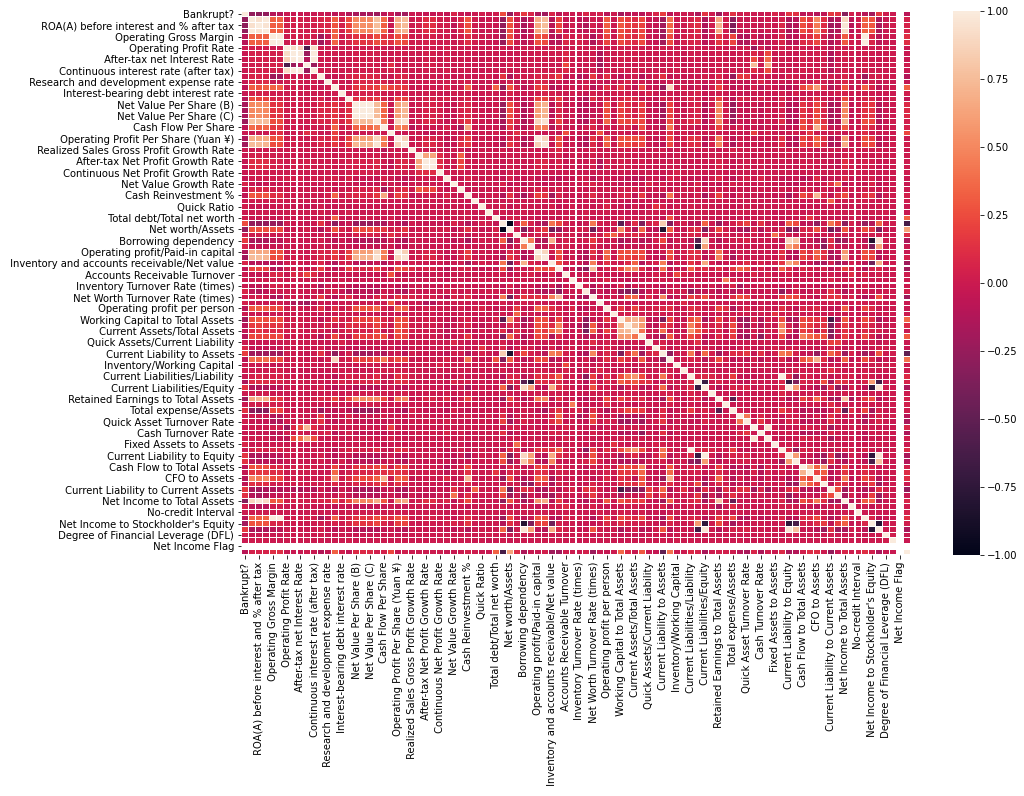

In [15]:
MLtemplate.corr_heatmap(bankdf)

In [4]:
numerical_columns = [i for i in bankdf.columns if i not in ['Bankrupt?',' Net Income Flag', ' Liability-Assets Flag' ]]

# numerical_columns

        ROA(C) before interest and depreciation before interest
count                                        6819.000000       
mean                                            0.505180       
std                                             0.060686       
min                                             0.000000       
25%                                             0.476527       
50%                                             0.502706       
75%                                             0.535563       
max                                             1.000000       
####### histogram ########


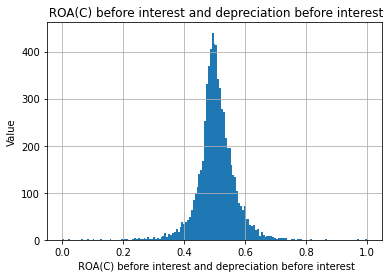

####### histogram ########


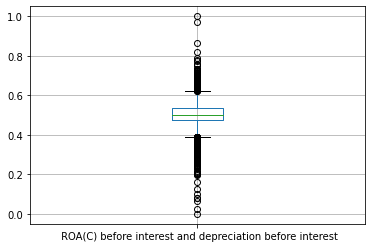

####### QQPLOT ########


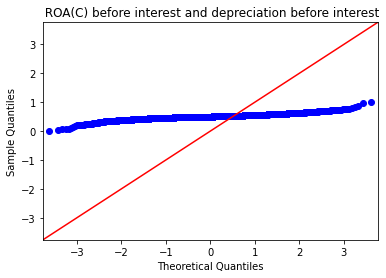

########Test for Normality#########
 ROA(C) before interest and depreciation before interest --> p value = 1.0
        ROA(A) before interest and % after tax
count                              6819.000000
mean                                  0.558625
std                                   0.065620
min                                   0.000000
25%                                   0.535543
50%                                   0.559802
75%                                   0.589157
max                                   1.000000
####### histogram ########


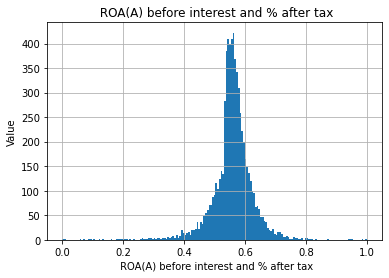

####### histogram ########


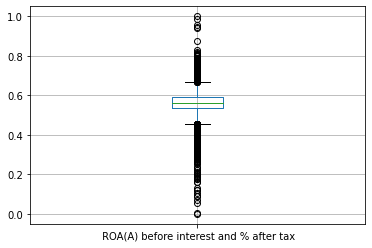

####### QQPLOT ########


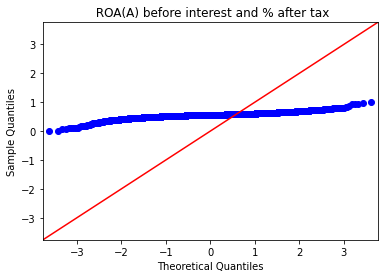

########Test for Normality#########
 ROA(A) before interest and % after tax --> p value = 1.0
        ROA(B) before interest and depreciation after tax
count                                        6819.000000 
mean                                            0.553589 
std                                             0.061595 
min                                             0.000000 
25%                                             0.527277 
50%                                             0.552278 
75%                                             0.584105 
max                                             1.000000 
####### histogram ########


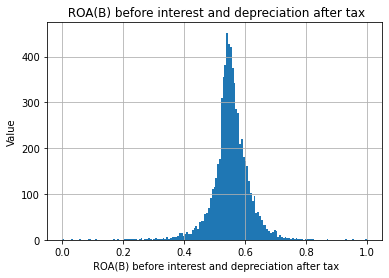

####### histogram ########


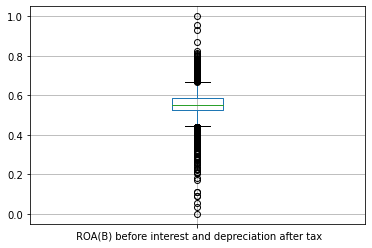

####### QQPLOT ########


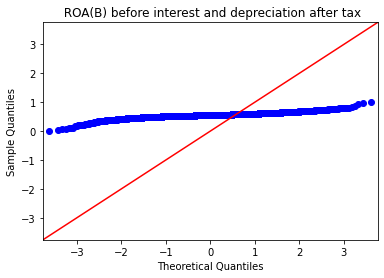

########Test for Normality#########
 ROA(B) before interest and depreciation after tax --> p value = 1.0
        Operating Gross Margin
count              6819.000000
mean                  0.607948
std                   0.016934
min                   0.000000
25%                   0.600445
50%                   0.605997
75%                   0.613914
max                   1.000000
####### histogram ########


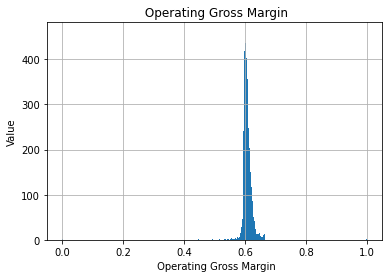

####### histogram ########


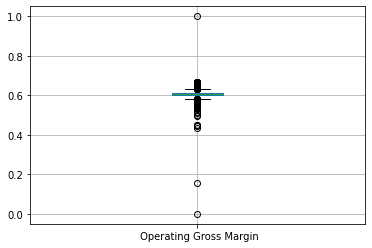

####### QQPLOT ########


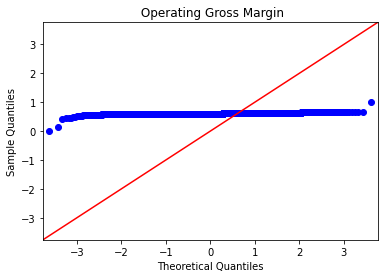

########Test for Normality#########
 Operating Gross Margin --> p value = 1.0
        Realized Sales Gross Margin
count                   6819.000000
mean                       0.607929
std                        0.016916
min                        0.000000
25%                        0.600434
50%                        0.605976
75%                        0.613842
max                        1.000000
####### histogram ########


KeyboardInterrupt: 

In [5]:
for i in numerical_columns:
    a = [i]
    MLtemplate.numerical_analysis(bankdf,a)


In [54]:
newbankdf[['Bankrupt?',' Net Income Flag', ' Liability-Assets Flag' ]]

Bankrupt?   Net Income Flag   Liability-Assets Flag
0             1                 1                       0
1             1                 1                       0
2             1                 1                       0
3             1                 1                       0
4             1                 1                       0
...         ...               ...                     ...
6814          0                 1                       0
6815          0                 1                       0
6816          0                 1                       0
6817          0                 1                       0
6818          0                 1                       0

[6819 rows x 3 columns]

In [65]:
bankdf["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [66]:
bankdf[' Net Income Flag'].value_counts()

1    6819
Name:  Net Income Flag, dtype: int64

In [67]:
bankdf[' Liability-Assets Flag' ].value_counts()

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64

In [71]:
bankdf[[' ROA(C) before interest and depreciation before interest', "Bankrupt?"]].sort_values(by=' ROA(C) before interest and depreciation before interest').head()

ROA(C) before interest and depreciation before interest  Bankrupt?
1035                                           0.000000                 0
1443                                           0.024277                 1
56                                             0.066933                 1
3392                                           0.081412                 0
1684                                           0.082826                 0

In [74]:
bankdf.shape[0]/3.0

2273.0

In [79]:
### testing by making buckets

cutdf = bankdf[[' ROA(C) before interest and depreciation before interest', "Bankrupt?"]]
cutdf["test"] = pd.qcut(cutdf[' ROA(C) before interest and depreciation before interest'],q=3)
cutdf[' ROA(C) before interest and depreciation before interest'].value_counts()

<ipython-input-79-feb24acbd4df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutdf["test"] = pd.qcut(cutdf[' ROA(C) before interest and depreciation before interest'],q=3)


In [91]:
matrix = cutdf[[ "Bankrupt?", "test"]].value_counts()


Bankrupt?  test           
0          (0.522, 1.0]       2271
           (0.486, 0.522]     2245
           (-0.001, 0.486]    2083
1          (-0.001, 0.486]     191
           (0.486, 0.522]       28
           (0.522, 1.0]          1
dtype: int64

In [94]:
contigency= pd.crosstab(cutdf['test'], cutdf['Bankrupt?']) 
contigency

Bankrupt?           0    1
test                      
(-0.001, 0.486]  2083  191
(0.486, 0.522]   2245   28
(0.522, 1.0]     2271    1

In [100]:
c, p, dof, expected = chi2_contingency(contigency)
print(p)
print(c)
print(dof)
print(expected)

2.4377757778637655e-65
297.553889974973
2
[[2200.63440387   73.36559613]
 [2199.66666667   73.33333333]
 [2198.69892946   73.30107054]]


In [101]:
p < 0.05
#therefore we reject null hyptheose that these groups are independent. They are associated

True

In [121]:

######## do chi squared for all numerical columns for independence
#### remove those where null hypothese is rejected
selected_columns =[]
diff_treatment = []
# numerical_columns.remove(" Tax rate (A)")
for i in numerical_columns:

    cutdf = bankdf[[i, "Bankrupt?"]]
    try:
        cutdf["bins"] = pd.qcut(cutdf[i],q=4)
        contigency= pd.crosstab(cutdf['bins'], cutdf['Bankrupt?']) 
        c, p, dof, expected = chi2_contingency(contigency)
        if p < 0.05:
            selected_columns.append(i)
    except ValueError:
        diff_treatment.append(i)

f2a1ef413ba>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutdf["bins"] = pd.qcut(cutdf[i],q=4)
<ipython-input-121-4f2a1ef413ba>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutdf["bins"] = pd.qcut(cutdf[i],q=4)
<ipython-input-121-4f2a1ef413ba>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [122]:
len(selected_columns)

85

In [123]:
diff_treatment

[' Tax rate (A)',
 ' Contingent liabilities/Net worth',
 ' Long-term Liability to Current Assets']

In [124]:
ch = [i for i in numerical_columns if i not in selected_columns]

In [125]:
ch

[' Operating Expense Rate',
 ' Tax rate (A)',
 ' Contingent liabilities/Net worth',
 ' Net Worth Turnover Rate (times)',
 ' Revenue per person',
 ' Current Liabilities/Liability',
 ' Long-term Liability to Current Assets',
 ' Current Liability to Liability']

In [6]:
####### feature selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

without_bank = bankdf.loc[:, bankdf.columns != 'Bankrupt?']
X_fe = MLtemplate.deep_copy(without_bank)
y_fe = MLtemplate.deep_copy(bankdf["Bankrupt?"])
scaler = StandardScaler()
scaler.fit(X_fe)
X_fe = scaler.transform(X_fe)
regressor = tree.DecisionTreeRegressor()
regressor.fit(X_fe, y_fe)

importance = regressor.feature_importances_
importance

array([0.01074793, 0.        , 0.05166404, 0.00440343, 0.        ,
       0.0133132 , 0.02101121, 0.0121208 , 0.01548186, 0.00426751,
       0.00752802, 0.00805667, 0.00609999, 0.        , 0.01262767,
       0.01368959, 0.01054475, 0.00769785, 0.03996969, 0.        ,
       0.        , 0.00637449, 0.02779325, 0.01107625, 0.01348787,
       0.00679828, 0.        , 0.00976277, 0.02639159, 0.        ,
       0.03672564, 0.01860737, 0.        , 0.        , 0.01338031,
       0.        , 0.        , 0.00939399, 0.00783103, 0.04525899,
       0.        , 0.00797207, 0.0169916 , 0.00343427, 0.00402599,
       0.        , 0.        , 0.01454494, 0.01553468, 0.00743691,
       0.        , 0.        , 0.        , 0.        , 0.01251384,
       0.00388236, 0.02418867, 0.        , 0.        , 0.        ,
       0.02480795, 0.01868973, 0.        , 0.00391383, 0.00285713,
       0.        , 0.        , 0.        , 0.01706997, 0.00821869,
       0.00401795, 0.01033203, 0.00105381, 0.02819594, 0.00352

In [7]:
# for c,d in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (c,d))
dict_col={}
for e in range(95):
    # print(without_bank.columns[e])
    dict_col[without_bank.columns[e]] = importance[e]

dict_col

{' ROA(C) before interest and depreciation before interest': 0.010747928244428329,
 ' ROA(A) before interest and % after tax': 0.0,
 ' ROA(B) before interest and depreciation after tax': 0.05166404007815799,
 ' Operating Gross Margin': 0.004403430616209067,
 ' Realized Sales Gross Margin': 0.0,
 ' Operating Profit Rate': 0.013313196392059747,
 ' Pre-tax net Interest Rate': 0.021011208912472556,
 ' After-tax net Interest Rate': 0.012120801003155096,
 ' Non-industry income and expenditure/revenue': 0.015481858638776427,
 ' Continuous interest rate (after tax)': 0.004267512032594409,
 ' Operating Expense Rate': 0.00752801906087363,
 ' Research and development expense rate': 0.008056672405885906,
 ' Cash flow rate': 0.0060999904640125615,
 ' Interest-bearing debt interest rate': 0.0,
 ' Tax rate (A)': 0.01262767005987111,
 ' Net Value Per Share (B)': 0.013689585795758803,
 ' Net Value Per Share (A)': 0.010544753356877578,
 ' Net Value Per Share (C)': 0.007697849077224739,
 ' Persistent EPS

In [8]:
######sort the scores
sorted_dict = {}
sorted_keys = sorted(dict_col, key=dict_col.get,reverse=True)
for e in sorted_keys:
    print(e + ' = ' + str(dict_col[e]) )

 Net Income to Stockholder's Equity = 0.1470062477214773
 Degree of Financial Leverage (DFL) = 0.05463930119534589
 ROA(B) before interest and depreciation after tax = 0.05166404007815799
 Borrowing dependency = 0.04525899089889834
 Persistent EPS in the Last Four Seasons = 0.03996968509573262
 Total Asset Return Growth Rate Ratio = 0.03672563995692749
 Cash Turnover Rate = 0.028195935088551387
 Per Share Net profit before tax (Yuan ¥) = 0.027793251451466293
 Total Asset Growth Rate = 0.02639159282576922
 Operating Funds to Liability = 0.024807952924407475
 Cash/Total Assets = 0.024188669995951352
 Pre-tax net Interest Rate = 0.021011208912472556
 Inventory/Working Capital = 0.01868973362816643
 Cash Reinvestment % = 0.01860736567592173
 Total income/Total expense = 0.017069971513068955
 Net profit before tax/Paid-in capital = 0.01699160175056819
 Net Income to Total Assets = 0.016804795951636378
 Fixed Assets Turnover Frequency = 0.015534675155659459
 Non-industry income and expenditu

In [10]:
#######select those columns where score is not 0
final_columns = [i for i in sorted_keys if dict_col[i] > 0.0]
final_columns

[" Net Income to Stockholder's Equity",
 ' Degree of Financial Leverage (DFL)',
 ' ROA(B) before interest and depreciation after tax',
 ' Borrowing dependency',
 ' Persistent EPS in the Last Four Seasons',
 ' Total Asset Return Growth Rate Ratio',
 ' Cash Turnover Rate',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Total Asset Growth Rate',
 ' Operating Funds to Liability',
 ' Cash/Total Assets',
 ' Pre-tax net Interest Rate',
 ' Inventory/Working Capital',
 ' Cash Reinvestment %',
 ' Total income/Total expense',
 ' Net profit before tax/Paid-in capital',
 ' Net Income to Total Assets',
 ' Fixed Assets Turnover Frequency',
 ' Non-industry income and expenditure/revenue',
 ' Inventory Turnover Rate (times)',
 ' Net Value Per Share (B)',
 ' Operating Profit Growth Rate',
 ' Interest Expense Ratio',
 ' Operating Profit Rate',
 ' Current Liability to Current Assets',
 ' Current Liability to Liability',
 ' Tax rate (A)',
 ' Quick Assets/Total Assets',
 ' After-tax net Interest Rate',
 '

In [12]:
columns_to_drop = [i for i in without_bank.columns if i not in final_columns]

In [13]:
columns_to_drop

[' ROA(A) before interest and % after tax',
 ' Realized Sales Gross Margin',
 ' Interest-bearing debt interest rate',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Regular Net Profit Growth Rate',
 ' Net Value Growth Rate',
 ' Current Ratio',
 ' Quick Ratio',
 ' Total debt/Total net worth',
 ' Debt ratio %',
 ' Contingent liabilities/Net worth',
 ' Accounts Receivable Turnover',
 ' Average Collection Days',
 ' Revenue per person',
 ' Operating profit per person',
 ' Allocation rate per person',
 ' Working Capital to Total Assets',
 ' Quick Assets/Current Liability',
 ' Cash/Current Liability',
 ' Current Liability to Assets',
 ' Inventory/Current Liability',
 ' Current Liabilities/Equity',
 ' Long-term Liability to Current Assets',
 ' Retained Earnings to Total Assets',
 ' Fixed Assets to Assets',
 ' Liability-Assets Flag',
 ' Total assets to GNP price',
 ' Gross Profit to Sales',
 ' Liability to Equity',
 ' Net Income Flag']

In [14]:
predictors = MLtemplate.drop_columns(without_bank, columns_to_drop)

In [15]:
predictors

ROA(C) before interest and depreciation before interest  \
0                                              0.370594          
1                                              0.464291          
2                                              0.426071          
3                                              0.399844          
4                                              0.465022          
...                                                 ...          
6814                                           0.493687          
6815                                           0.475162          
6816                                           0.472725          
6817                                           0.506264          
6818                                           0.493053          

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Operating Profit Rate  \
0                    0.601457                0.998969   
1                    0.610235                0.998946   
2                    0.601450                0.998857   
3                    0.583541                0.998700   
4                    0.598783                0.998973   
...                       ...                     ...   
6814                 0.604455                0.998992   
6815                 0.598308                0.998992   
6816                 0.610444                0.998984   
6817                 0.607850                0.999074   
6818                 0.627409                0.998080   

       Pre-tax net Interest Rate   After-tax net Interest Rate  \
0                       0.796887                      0.808809   
1                       0.797380                      0.809301   
2                       0.796403                      0.808388   
3                       0.796967                      0.808966   
4                       0.797366                      0.809304   
...                          ...                           ...   
6814                    0.797409                      0.809331   
6815                    0.797414                      0.809327   
6816                    0.797401                      0.809317   
6817                    0.797500                      0.809399   
6818                    0.801987                      0.813800   

       Non-industry income and expenditure/revenue  \
0                                         0.302646   
1                                         0.303556   
2                                         0.302035   
3                                         0.303350   
4                                         0.303475   
...                                            ...   
6814                                      0.303510   
6815                                      0.303520   
6816                                      0.303512   
6817                                      0.303498   
6818                                      0.313415   

       Continuous interest rate (after tax)   Operating Expense Rate  \
0                                  0.780985             1.256969e-04   
1                                  0.781506             2.897851e-04   
2                                  0.780284             2.361297e-04   
3                                  0.781241             1.078888e-04   
4     

In [16]:
labels = bankdf["Bankrupt?"]

In [17]:
MLtemplate.predict_model(bankdf,"KNN", "classification",predictors,labels, n=6)

####### confusion matrix ########
[[1305    1]
 [  53    5]]
######## confusion report #########
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1306
           1       0.83      0.09      0.16        58

    accuracy                           0.96      1364
   macro avg       0.90      0.54      0.57      1364
weighted avg       0.96      0.96      0.94      1364

###### log loss ###########
log loss :  1.3673714992101234
######### AUC ########
0.5427205998838254


In [23]:
accuracyscores = []
for i in range(1,20):
    accuracyscores.append(MLtemplate.predict_model(bankdf,"KNN", "classification",predictors,labels, n=i, get_score=1))

####### confusion matrix ########
[[1295   26]
 [  36    7]]
######## confusion report #########
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1321
           1       0.21      0.16      0.18        43

    accuracy                           0.95      1364
   macro avg       0.59      0.57      0.58      1364
weighted avg       0.95      0.95      0.95      1364

###### log loss ###########
log loss :  1.569959623180094
######### AUC ########
0.5715543193141207
####### confusion matrix ########
[[1309    6]
 [  46    3]]
######## confusion report #########
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1315
           1       0.33      0.06      0.10        49

    accuracy                           0.96      1364
   macro avg       0.65      0.53      0.54      1364
weighted avg       0.94      0.96      0.95      1364

###### log loss ###########
log loss :  1.3167310631

In [24]:
accuracyscores

[0.9545454545454546,
 0.9618768328445748,
 0.9758064516129032,
 0.968475073313783,
 0.969208211143695,
 0.9714076246334311,
 0.9714076246334311,
 0.9706744868035191,
 0.9618768328445748,
 0.9611436950146628,
 0.9743401759530792,
 0.966275659824047,
 0.969208211143695,
 0.9706744868035191,
 0.9772727272727273,
 0.9618768328445748,
 0.968475073313783,
 0.9721407624633431,
 0.9772727272727273]

Text(0, 0.5, 'Accuracy')

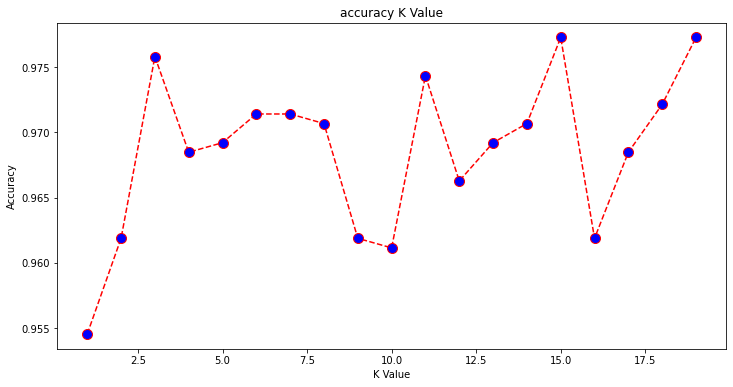

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), accuracyscores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('accuracy K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')